In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Task 1

In [2]:
x_a_train = [-2, -2, -2, -2, -1, -1, -1, -1, -0.8, -0.8, -0.8, -0.8, -0.4, -0.4, -0.4, -0.4,
            0.4, 0.4, 0.8, 0.8, 0.8, 1,   1.5, 1.5]
y_a_train = [-1.5, -1, -0.4, -0.2, -1.5, -1, -0.4, -0.2, -1.5, -1, -0.4, -0.2, -1.5, -1, -0.4, -0.2, 
            1,   0.8, 0.8, 1,   1.5, 0.2, 0.2, 1.5]

In [3]:
x_a_test = [0.2, 0.2, 0.8, 1,   1, 1,   1.5, 1.5]
y_a_test = [0.2, 1.5, 0.2, 0.8, 1, 1.5, 0.8, 1]

In [4]:
x_b_train = [-1.5, -1.5, -1.5, -1,  -1, -1, -1, -0.8, -0.8, -0.8, -0.2, -0.2,
            0.5, 0.5, 0.5, 0.5, 0.8, 0.8, 0.8, 0.8, 1, 1, 1, 1, 1.5, 1.5, 1.5]
y_b_train = [0.4,   0.8,    1, 0.2, 0.4, 1, 1.5, 0.2,  0.8,  1.5, 0.5,  1.5,
            -1.5, -1, -0.8, -0.4, -1.5, -1, -0.8, -0.4, -1.5, -1, -0.8, -0.4, -1.5, -0.8, -0.4, ]

In [5]:
x_b_test = [-1.5, -0.8, -0.2, -0.2, 1.5]
y_b_test = [1.5,    1,    1,   0.8, -1]

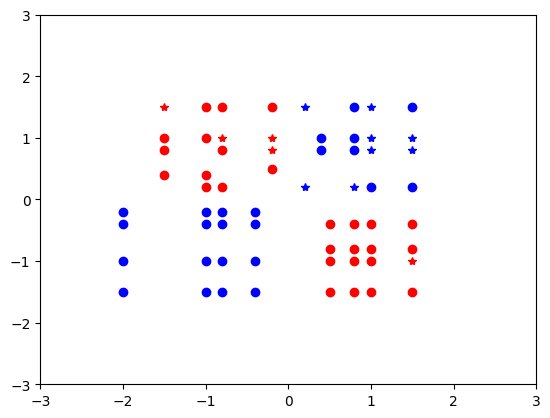

In [6]:
plt.xlim(right=3)
plt.xlim(left=-3)

plt.ylim(top=3)
plt.ylim(bottom=-3)

plt.plot(x_a_train, y_a_train, 'bo', x_a_test, y_a_test, 'b*', 
         x_b_train, y_b_train, 'ro', x_b_test, y_b_test, 'r*');

In [7]:
X_train = []
Y_train = []
for i, j in zip(x_a_train, y_a_train):   # let A be 0 and B to be 1
    X_train.append((i, j))
    Y_train.append(0)

for i, j in zip(x_b_train, y_b_train):   # let A be 0 and B to be 1
    X_train.append((i, j))
    Y_train.append(1)

In [8]:
X_test = []
Y_test = []
for i, j in zip(x_a_test, y_a_test):   # let A be 0 and B to be 1
    X_test.append((i, j))
    Y_test.append(0)

for i, j in zip(x_b_test, y_b_test):   # let A be 0 and B to be 1
    X_test.append((i, j))
    Y_test.append(1)

In [9]:
df_train = pd.DataFrame(X_train).rename(columns={0:'X', 1:'Y'})
df_test = pd.DataFrame(X_test).rename(columns={0:'X', 1:'Y'})

df_train['mult'] = df_train['X']*df_train['Y']
df_test['mult'] = df_test['X']*df_test['Y']

In [10]:
model = LogisticRegression().fit(df_train, Y_train)

### Score is very low 23%, but it can easily be 100%

The key is in visualization and feature engineering based on visual observations

Hint: try to matematically change values, like: all X coordinates - relative Y coordinates

In [11]:
model.score(df_test, Y_test)

1.0

# Task 2

In [12]:
df = pd.read_csv("task_2_dataset.csv", index_col=0)
df

,features_1,features_2,features_3,label
0,2.5,0.00,58,B
1,2.5,0.02,61,B
2,2.5,0.05,33,B
3,2.5,0.07,89,B
4,2.5,0.10,58,B
...,...,...,...,...
1253,2.0,-0.09,30,A
1254,2.0,-0.07,41,A
1255,2.0,-0.05,30,A
1256,2.0,-0.03,3,A


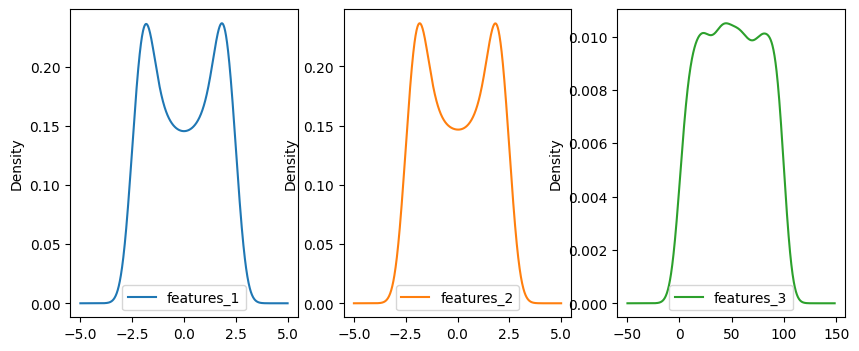

In [13]:
features=['features_1', 'features_2', 'features_3']

df[features].plot(
    kind="density", subplots=True, layout=(1, 3), sharex=False, figsize=(10, 4)
);

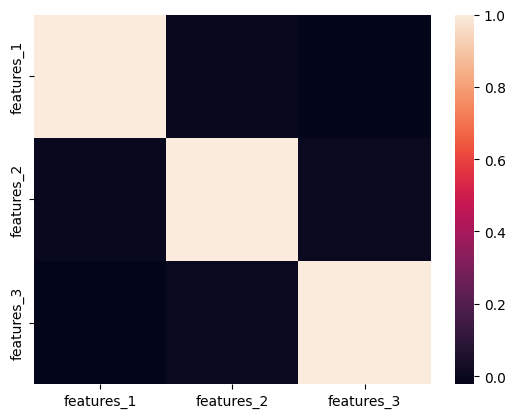

In [14]:
! pip install -Uqq seaborn
import seaborn as sns

corr_matrix = df[features].corr()
sns.heatmap(corr_matrix);

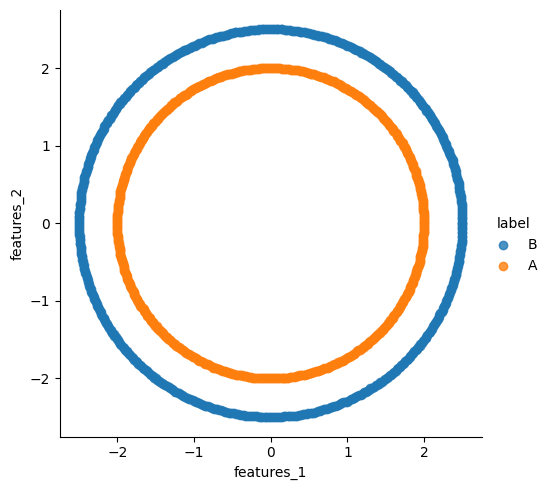

In [15]:
sns.lmplot(
    x="features_1", y="features_2", data=df, hue="label", fit_reg=False
);

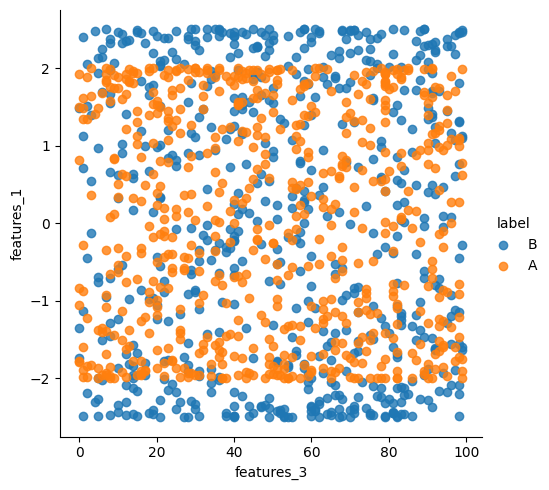

In [16]:
sns.lmplot(
    x="features_3", y="features_1", data=df, hue="label", fit_reg=False
);

In [17]:
df['r'] = np.sqrt(df['features_1']**2+df['features_2']**2)

In [18]:
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
    )

In [19]:
model = LogisticRegression().fit(X_train, y_train)
model.score(X_test, y_test)

1.0

### score is about 50%, but again it can be 100%

The key is again in visualization

Hint: try to visualize in various of ways to see patterns